# QUANTIUM DATA ANALYTICS VIRTUAL EXPERIENCE PROGRAM 

In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re
import matplotlib.style as style
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/quantium-data-analytics-virtual-experience-program/PurchaseBehaviour.csv
/kaggle/input/quantium-data-analytics-virtual-experience-program/Transactions.csv


Read ***Transactions.csv*** and ***PurchaseBehaviour.csv***

In [2]:
t_data=pd.read_csv("/kaggle/input/quantium-data-analytics-virtual-experience-program/Transactions.csv")
pb_data=pd.read_csv("/kaggle/input/quantium-data-analytics-virtual-experience-program/PurchaseBehaviour.csv")

# DATA CLEANING

Looking at the shape of our data *(rows,columns)*

In [3]:
t_data.shape

(264836, 8)

Looking at first five entries of Transactions.csv:

In [4]:
t_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Converting the date offset value in **DATE** column into a ISO date format:

In [5]:
base_date = pd.Timestamp('1899-12-30')
t_data.DATE= t_data['DATE'].map(lambda x: base_date + pd.DateOffset(x))
t_data['DATE'] = t_data['DATE'].map(lambda x:x.date())

Creating a new **DAY** column containing weekday name of the transaction:

In [6]:
t_data['DAY'] = t_data['DATE'].map(lambda x: x.strftime("%A") )

In [7]:
t_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Wednesday
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,Tuesday
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Monday
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Friday
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Saturday


Extracting product weight from the **PROD_NAME** colmun and storing it in a new **PROD_WEIGHT** column:

In [8]:
t_data['PROD_WEIGHT'] = t_data['PROD_NAME'].map(lambda x: float(''.join(re.findall(r'\d+', x))))

Removing the product weight information from **PROD_NAME** column:

In [9]:
t_data['PROD_NAME'] = t_data['PROD_NAME'].map(lambda x: ''.join(re.findall(r'\D+', x))[:-1])

Checking for products that are chips:

In [10]:
t_data['Is_Chip'] = t_data['PROD_NAME'].map(lambda x: 'chip' in x.lower())
t_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY,PROD_WEIGHT,Is_Chip
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,Wednesday,175.0,True
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,Tuesday,175.0,False
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Monday,170.0,True
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,Friday,175.0,True
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,Saturday,150.0,False


Removing products from data that aren't chips:

In [11]:
t_data.drop(t_data[t_data['Is_Chip'] == False].index, inplace = True) 
t_data.drop(['Is_Chip'], axis = 1, inplace = True)

In [12]:
t_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY,PROD_WEIGHT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,Wednesday,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Monday,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,Friday,175.0
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,Thursday,330.0
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,Monday,150.0


The name of the brand of the product is the first word of **PROD_NAME**

Extracting brand name and storing in a new **BRAND** column:

In [13]:
 t_data['PROD_NAME'][0].split(' ', 1)[0]

'Natural'

In [14]:
t_data['BRAND'] = t_data['PROD_NAME'].map(lambda x: x.split(' ', 1)[0])

In [15]:
t_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY,PROD_WEIGHT,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,Wednesday,175.0,Natural
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Monday,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,Friday,175.0,Smiths
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,Thursday,330.0,Smiths
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,Monday,150.0,Doritos


Checking if there are any nulls in the data:

In [16]:
t_data.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
DAY               0
PROD_WEIGHT       0
BRAND             0
dtype: int64

Looking at first five entries of PurchasingBeahviour.csv:

In [17]:
pb_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


Carrying out a **LEFT JOIN** between t_data and pb_data:

In [18]:
combined_data= pd.merge(t_data,pb_data,on='LYLTY_CARD_NBR',how='left')
combined_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY,PROD_WEIGHT,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,Wednesday,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Monday,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,Friday,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,Thursday,330.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,Monday,150.0,Doritos,MIDAGE SINGLES/COUPLES,Budget


Checking if there are any nulls in the data:

In [19]:
combined_data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
DAY                 0
PROD_WEIGHT         0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Saving the combined data as a csv file:

In [20]:
combined_data.to_csv(r'C:\Users\user\Desktop\SNIGDHA\C-data.csv',header=True)

# EXPLORATORY DATA ANALYSIS

In [21]:
combined_data.shape

(74570, 13)

In [22]:
combined_data.PROD_NAME.describe()

count                                    74570
unique                                      33
top       Cobs Popd Swt/Chlli &Sr/Cream Chips 
freq                                      3269
Name: PROD_NAME, dtype: object

In [23]:
combined_data.PROD_QTY.describe()

count    74570.000000
mean         1.904264
std          0.343675
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: PROD_QTY, dtype: float64

In [24]:
combined_data.TOT_SALES.describe()

count    74570.000000
mean         6.860511
std          2.256661
min          1.900000
25%          5.800000
50%          6.600000
75%          7.800000
max         29.500000
Name: TOT_SALES, dtype: float64

In [25]:
combined_data.PROD_WEIGHT.describe()

count    74570.000000
mean       179.815140
std         59.017981
min        110.000000
25%        160.000000
50%        175.000000
75%        175.000000
max        380.000000
Name: PROD_WEIGHT, dtype: float64

In [26]:
combined_data.BRAND.describe()

count      74570
unique         8
top       Smiths
freq       16872
Name: BRAND, dtype: object

In [27]:
combined_data.LIFESTAGE.describe()

count                     74570
unique                        7
top       OLDER SINGLES/COUPLES
freq                      15304
Name: LIFESTAGE, dtype: object

In [28]:
combined_data.PREMIUM_CUSTOMER.describe()

count          74570
unique             3
top       Mainstream
freq           28539
Name: PREMIUM_CUSTOMER, dtype: object

In [29]:
combined_data.DATE.describe()

count          74570
unique           364
top       2018-12-24
freq             285
Name: DATE, dtype: object

In [30]:
combined_data.DATE.max()

datetime.date(2019, 6, 30)

Searching for the missing date:

In [31]:
pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(combined_data.DATE)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

**INSIGHTS:**
1. There is no record for 2018-12-25 because it was christmas and the shop was closed so no transactions took place.
2. 74570 out of 264836 transactions were made for chips products, which is almost 28% of total transactions.
3. Cobs Popd Swt/Chlli &Sr/Cream Chips was the most famous chips during the specified period.
4. Smiths was the most famous chips brand during the specified period.
5. Most of the customers bought products of quantity 2.
6. Most of the customers bought products that weighed 175g.
7. Most of the customers were 'Older Singles/Couples'.
8. Most of the customers purchased mainstream products.

# DATA VISUALIZATION

In [32]:
style.use('seaborn-poster')
sns.set_style('darkgrid')

**INSIGHTS:**
1. There is a surge in total sales around october 2018 and june 2019
2. These is a small gap in december 2019 which is accounted by the missing record on 2018-12-25

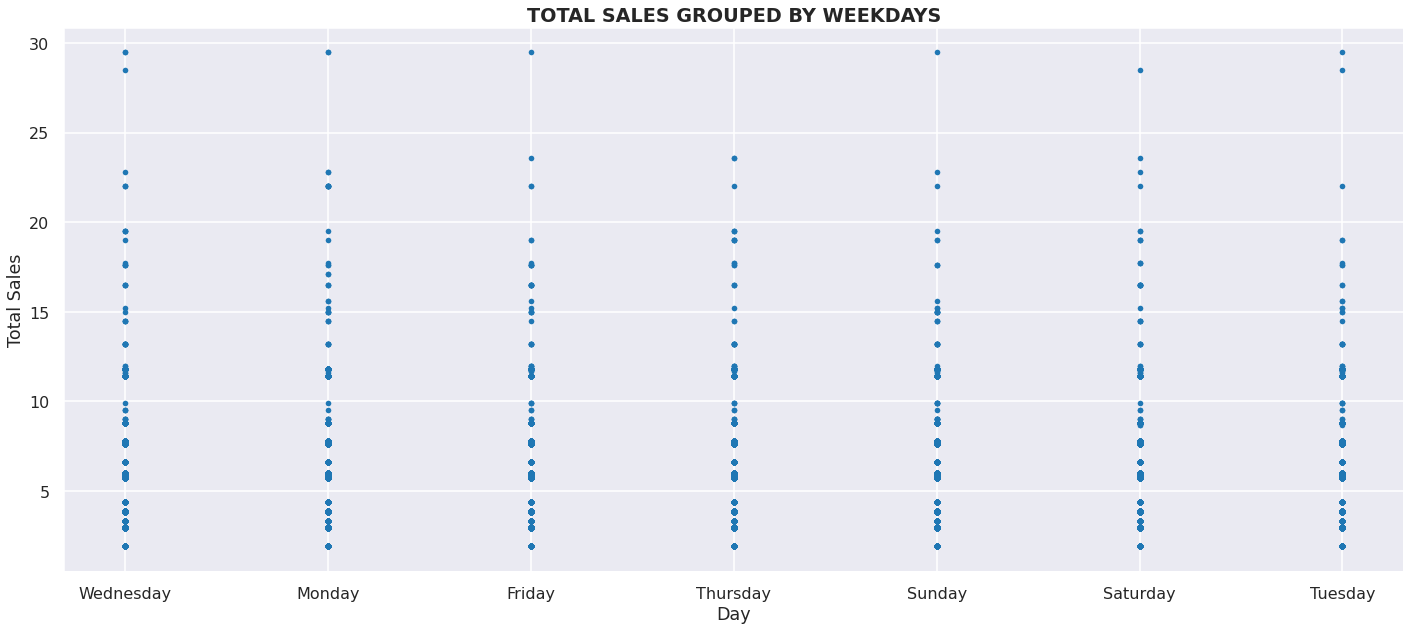

In [33]:
plt.figure(figsize=(24,10))
plt.plot(combined_data['DAY'], combined_data['TOT_SALES'], '.')
plt.title('TOTAL SALES GROUPED BY WEEKDAYS',fontweight='bold')
plt.ylabel('Total Sales')
plt.xlabel('Day')
plt.show()

**INSIGHTS:**
1. Total sales are the lowest on thursdays

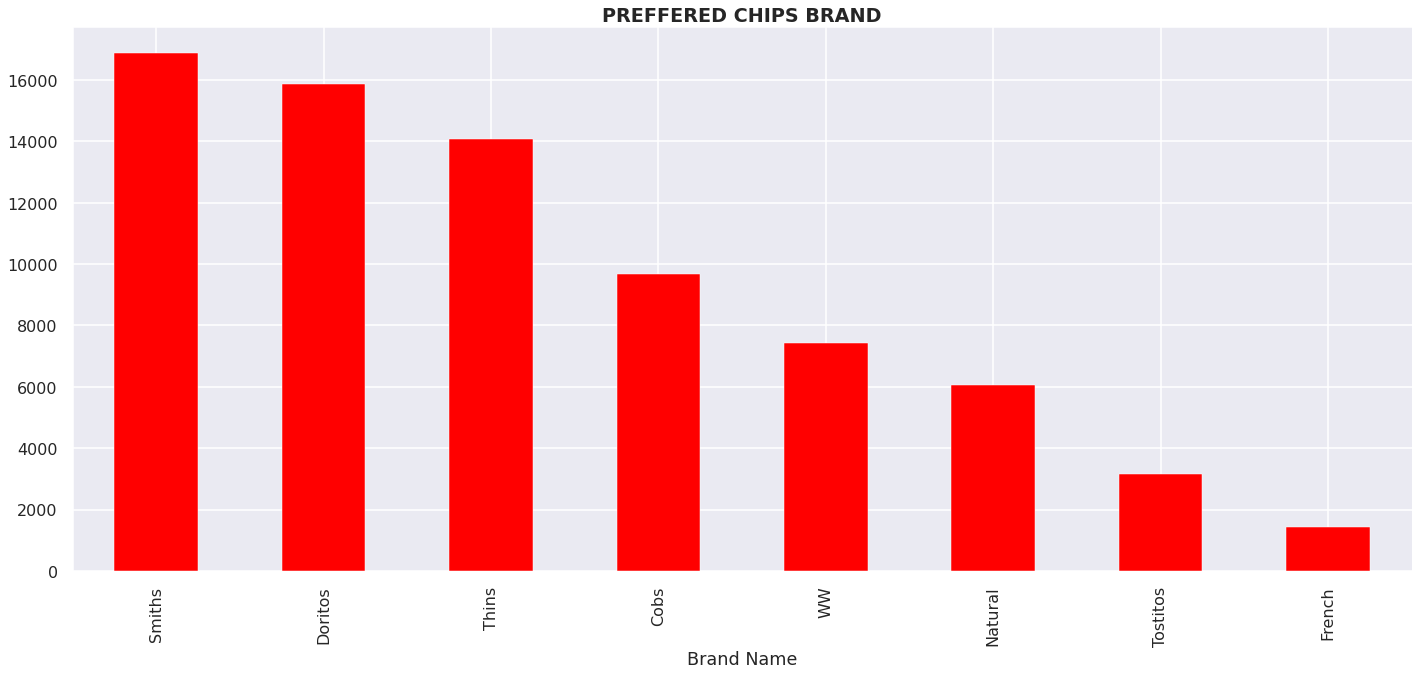

In [34]:
plt.figure(figsize=(24,10))
combined_data.BRAND.value_counts().plot(kind='bar',color='r',grid=True)
plt.title('PREFFERED CHIPS BRAND',fontweight='bold')
plt.xlabel('Brand Name')
plt.show()

**INSIGHTS:**
1. Smiths is the most preferred brand
2. French is the least preferred brand

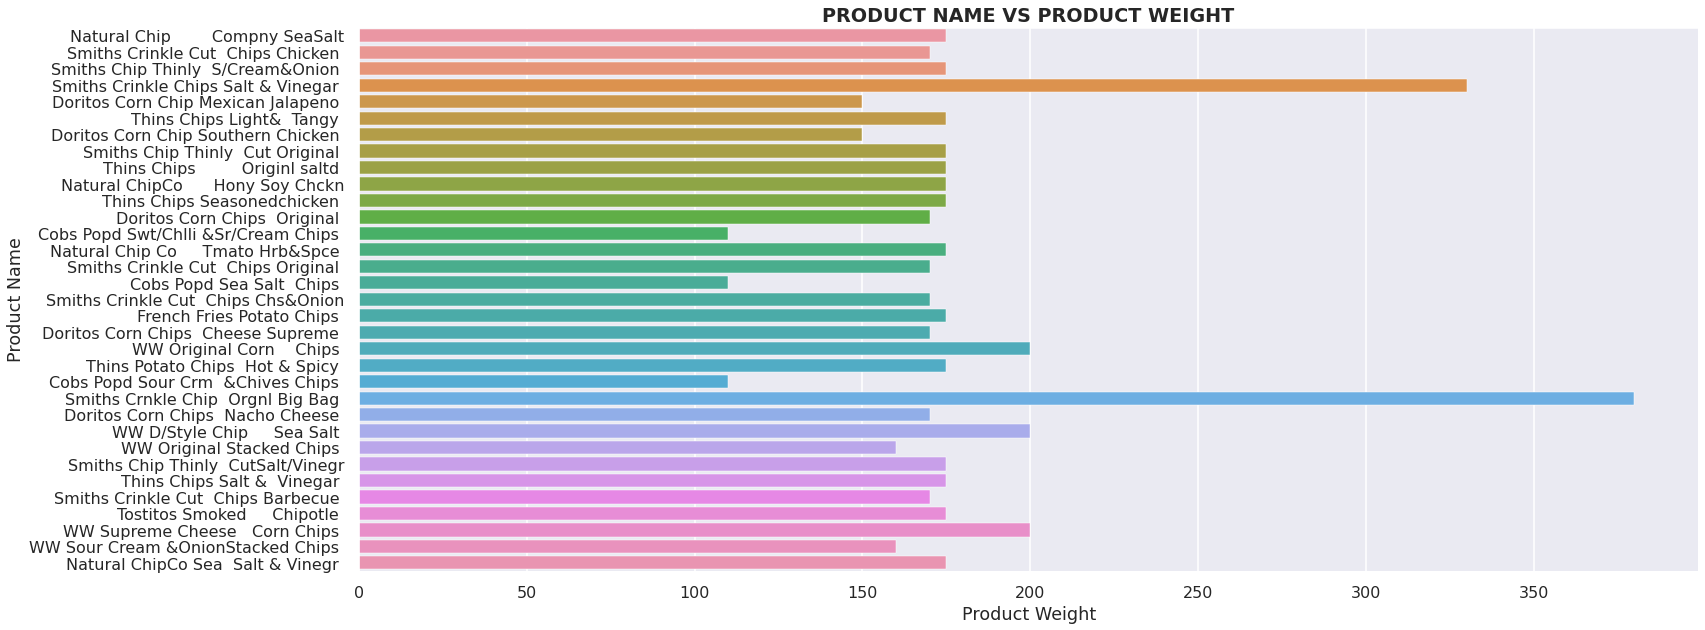

In [35]:
plt.figure(figsize=(24,10))
sns.barplot(x=combined_data['PROD_WEIGHT'], y=combined_data['PROD_NAME'])
plt.title('PRODUCT NAME VS PRODUCT WEIGHT',fontweight='bold')
plt.ylabel('Product Name')
plt.xlabel('Product Weight')
plt.show()

**INSIGHTS:**
1. Most of the customers preferred Smiths Crinkle Chip Orgnl Big Bag & Smiths Crinkle Chip Salt & Vinegar when buying heavy weighted chips product.
2. Cobs Popd Swt/Chlli &Sr/Cream Chips is the most preferred chips but is the least weighted product.

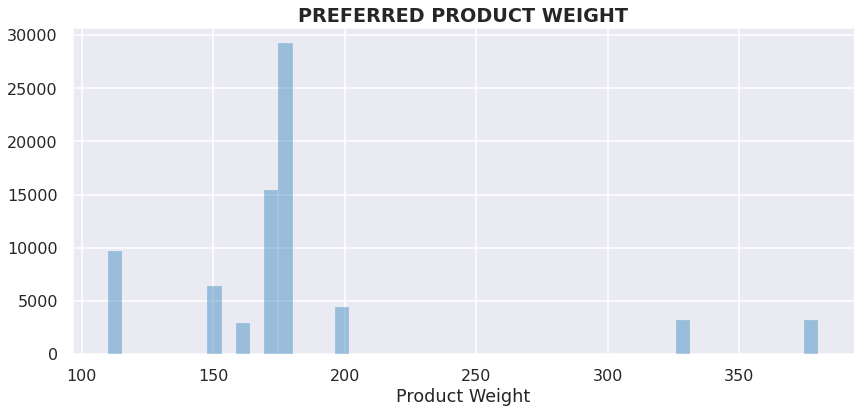

In [36]:
plt.figure(figsize=(14,6))
sns.distplot(a=combined_data['PROD_WEIGHT'], kde=False)
plt.title('PREFERRED PRODUCT WEIGHT',fontweight='bold')
plt.xlabel('Product Weight')
plt.show()

**INSIGHTS:**
1. Most of the customers prefer to buy products that weigh between 150-200g
2. Very few customers prefer products that weigh more than 350g

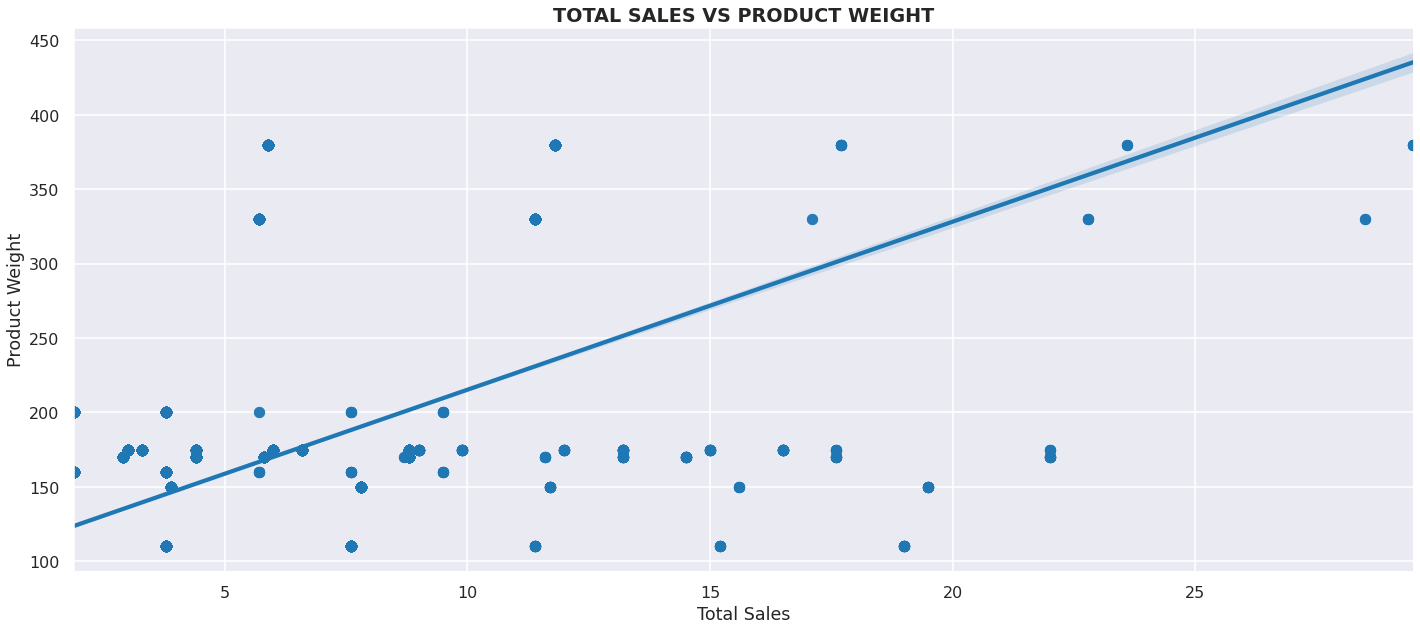

In [37]:
plt.figure(figsize=(24,10))
sns.regplot(x=combined_data['TOT_SALES'], y=combined_data['PROD_WEIGHT'])
plt.title('TOTAL SALES VS PRODUCT WEIGHT',fontweight='bold')
plt.ylabel('Product Weight')
plt.xlabel('Total Sales')
plt.show()

**INSIGHTS:**
1. There is almost a linear relationship between total sales and product weight, meaning the total sales increase as product weight increases ( quite obvious )
2. Low weighted products contribute to total sales the most

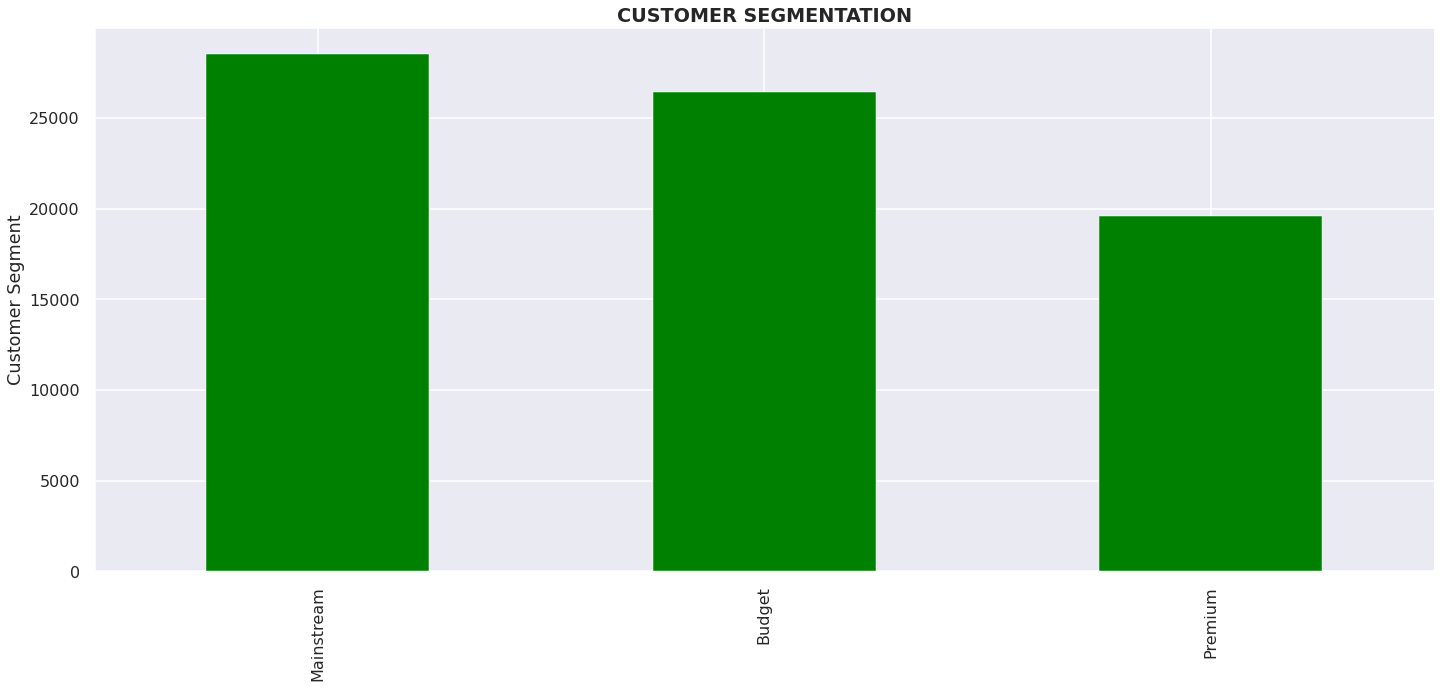

In [38]:
plt.figure(figsize=(24,10))
combined_data.PREMIUM_CUSTOMER.value_counts().plot(kind='bar',color='g',grid=True)
plt.title('CUSTOMER SEGMENTATION',fontweight='bold')
plt.ylabel('Customer Segment')
plt.show()

**INSIGHTS:**
1. Most of the customers buy mainstream products
2. Less amount of customers buy premium products

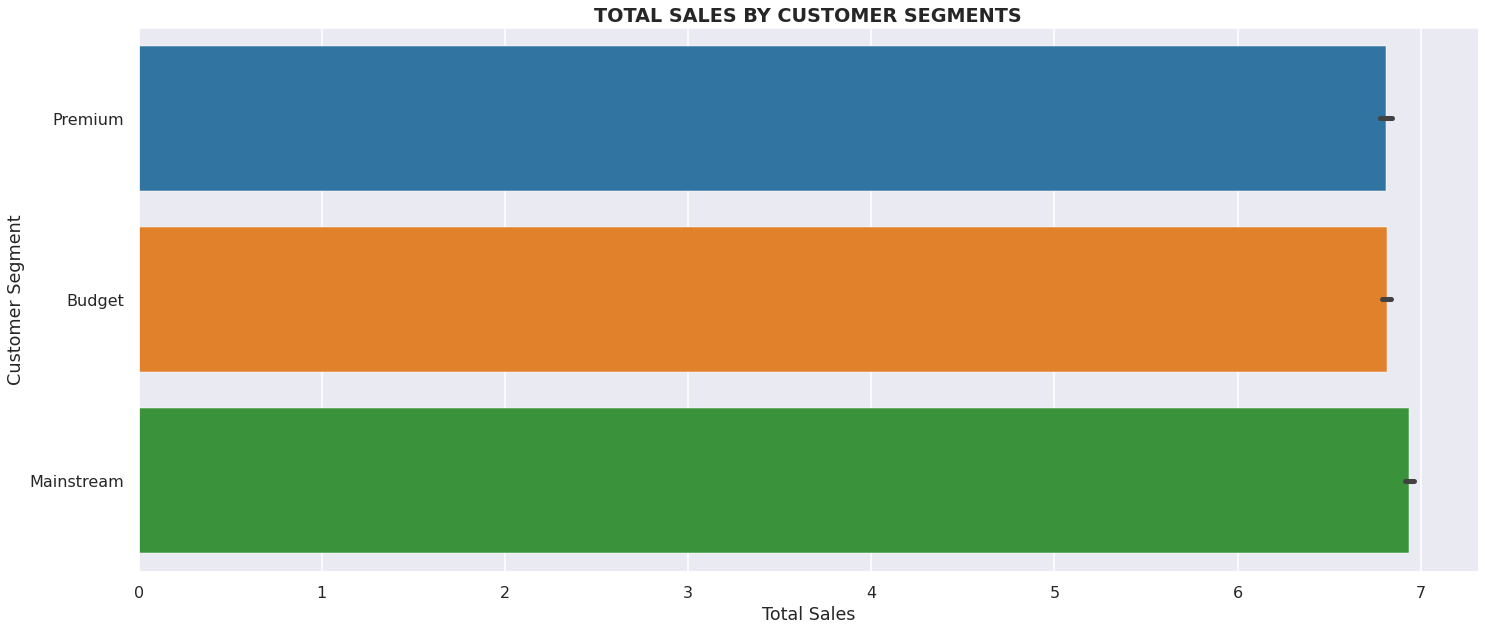

In [39]:
plt.figure(figsize=(24,10))
sns.barplot(x=combined_data['TOT_SALES'], y=combined_data['PREMIUM_CUSTOMER'])
plt.title('TOTAL SALES BY CUSTOMER SEGMENTS',fontweight='bold')
plt.ylabel('Customer Segment')
plt.xlabel('Total Sales')
plt.show()

**INSIGHTS:**
1. Mainstream products generate maximum amount of sales
2. Budget products generate least amount of sales

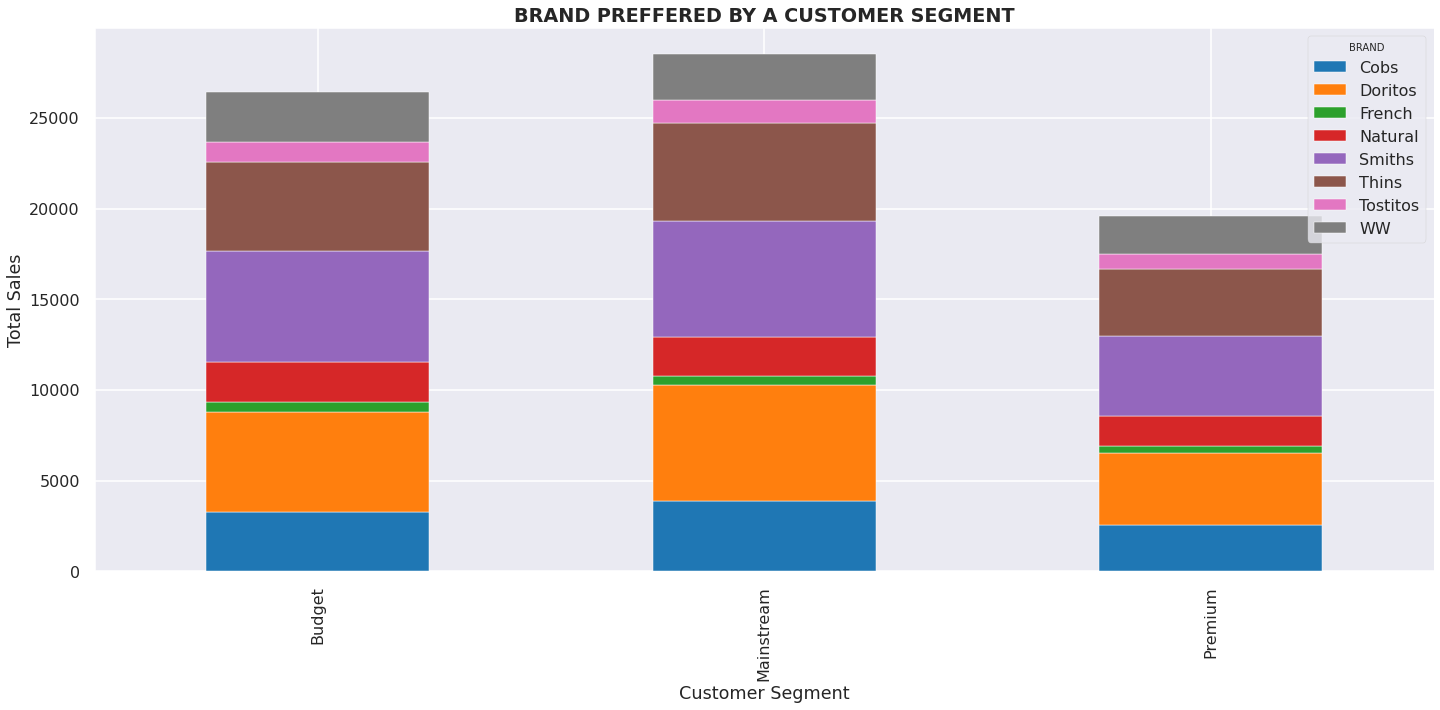

In [40]:
plt.rcParams['figure.figsize'] = (24, 10)
combined_data.groupby(['PREMIUM_CUSTOMER','BRAND']).size().unstack().plot(kind='bar',stacked=True)
plt.title('BRAND PREFFERED BY A CUSTOMER SEGMENT',fontweight='bold')
plt.ylabel('Total Sales')
plt.xlabel('Customer Segment')
plt.show()

**INSIGHTS:**
1. Smiths is the preferred brand by all types of customers.
2. Doritos is also a more preferred brand by the mainstream customers.

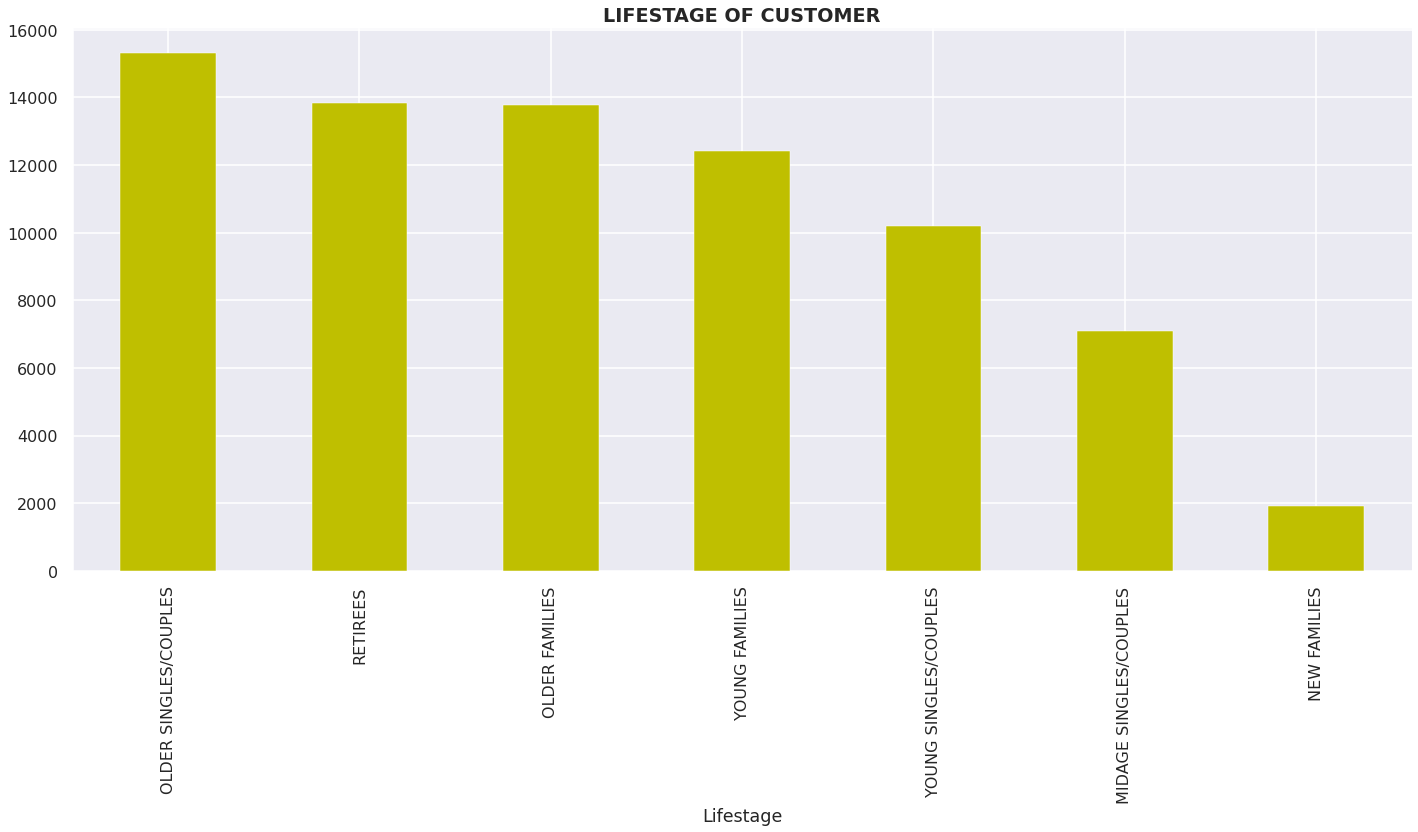

In [41]:
plt.figure(figsize=(24,10))
combined_data.LIFESTAGE.value_counts().plot(kind='bar',color='y',grid=True)
plt.title('LIFESTAGE OF CUSTOMER',fontweight='bold')
plt.xlabel('Lifestage')
plt.show()

**INSIGHTS:**
1. Most of the customers are older singles/couples
2. Least amount of customers belong to new families

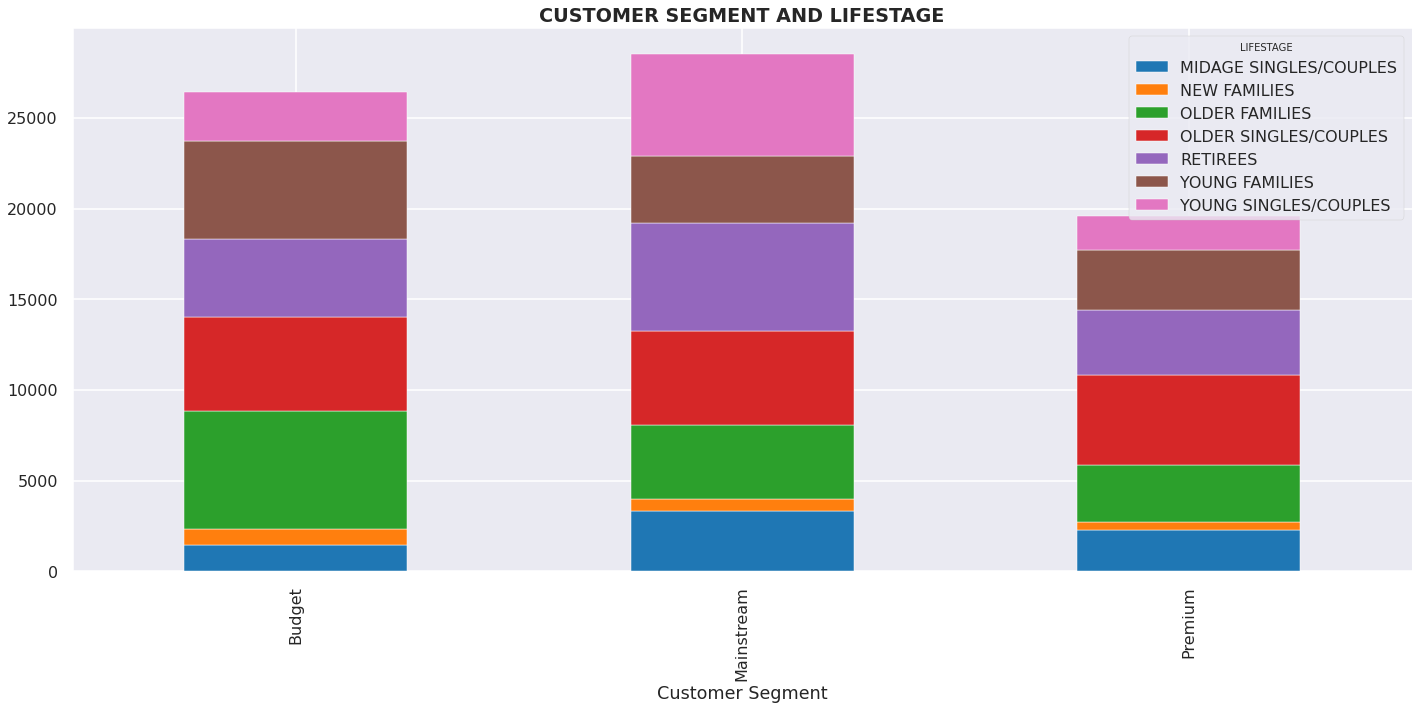

In [42]:
plt.rcParams['figure.figsize'] = (24, 10)
combined_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).size().unstack().plot(kind='bar',stacked=True)
plt.title('CUSTOMER SEGMENT AND LIFESTAGE',fontweight='bold')
plt.xlabel('Customer Segment')
plt.show()

**INSIGHTS:**
1. Older families usually buy budget-rated products however this could be because of the large amount of older families' customers.
2. New and Young families prefer budget-rated products.
3. Midage singles/couples, Young singles/couples and retirees prefer mainstream-rated products.

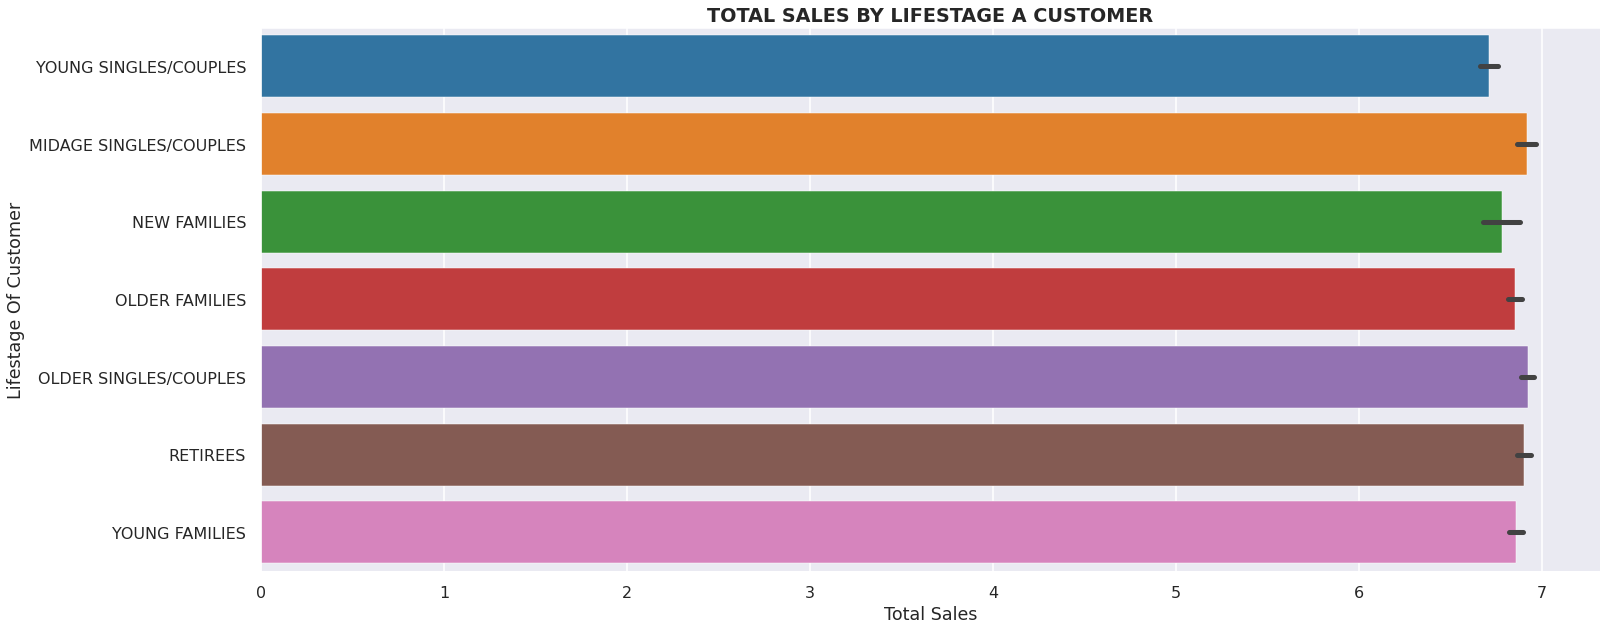

In [43]:
plt.figure(figsize=(24,10))
sns.barplot(x=combined_data['TOT_SALES'], y=combined_data['LIFESTAGE'])
plt.title('TOTAL SALES BY LIFESTAGE A CUSTOMER',fontweight='bold')
plt.ylabel('Lifestage Of Customer')
plt.xlabel('Total Sales')
plt.show()

**INSIGHTS:**
1. Older and midage singles/couples generate maximum sales
2. Young singles/couples generate minimum sales

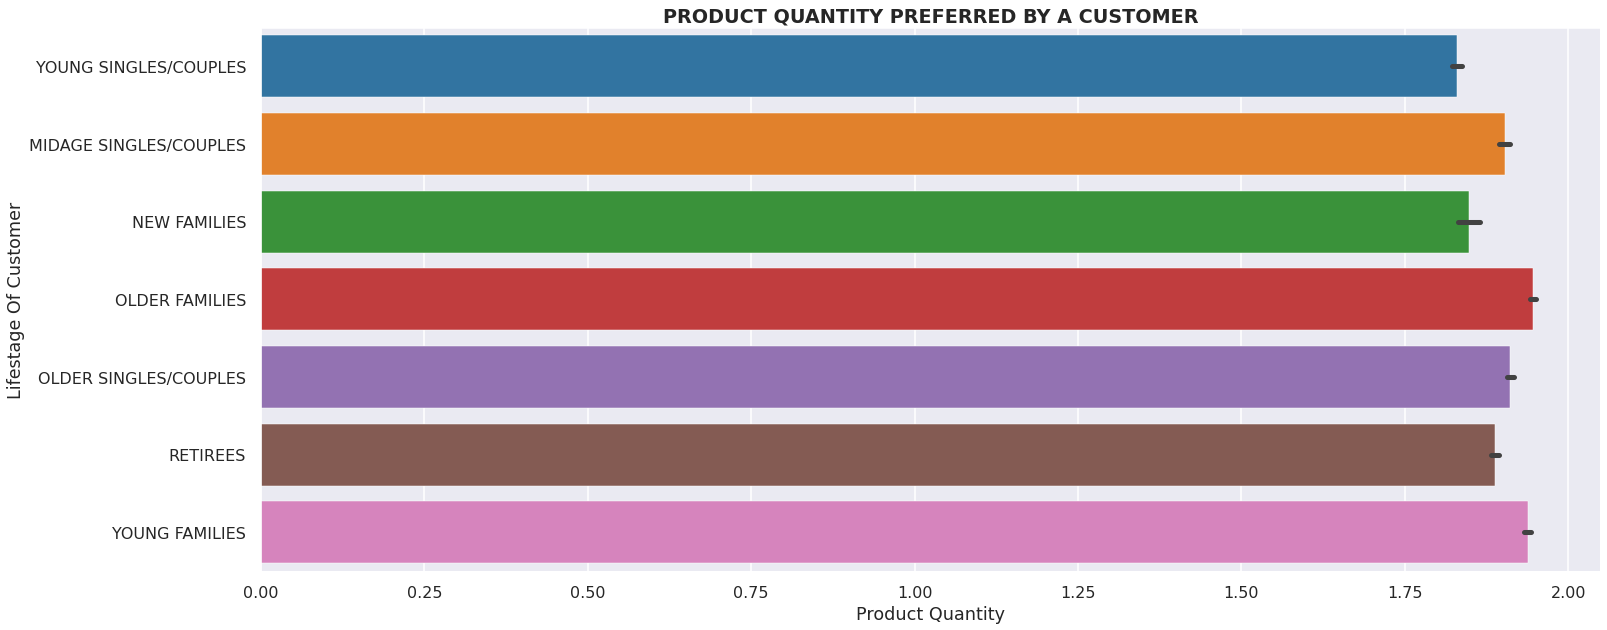

In [44]:
plt.figure(figsize=(24,10))
sns.barplot(x=combined_data['PROD_QTY'], y=combined_data['LIFESTAGE'])
plt.title('PRODUCT QUANTITY PREFERRED BY A CUSTOMER',fontweight='bold')
plt.ylabel('Lifestage Of Customer')
plt.xlabel('Product Quantity')
plt.show()

**INSIGHTS:**
1. Older families buy products in maximum quantity
2. Young singles/couples buy products in least quantity

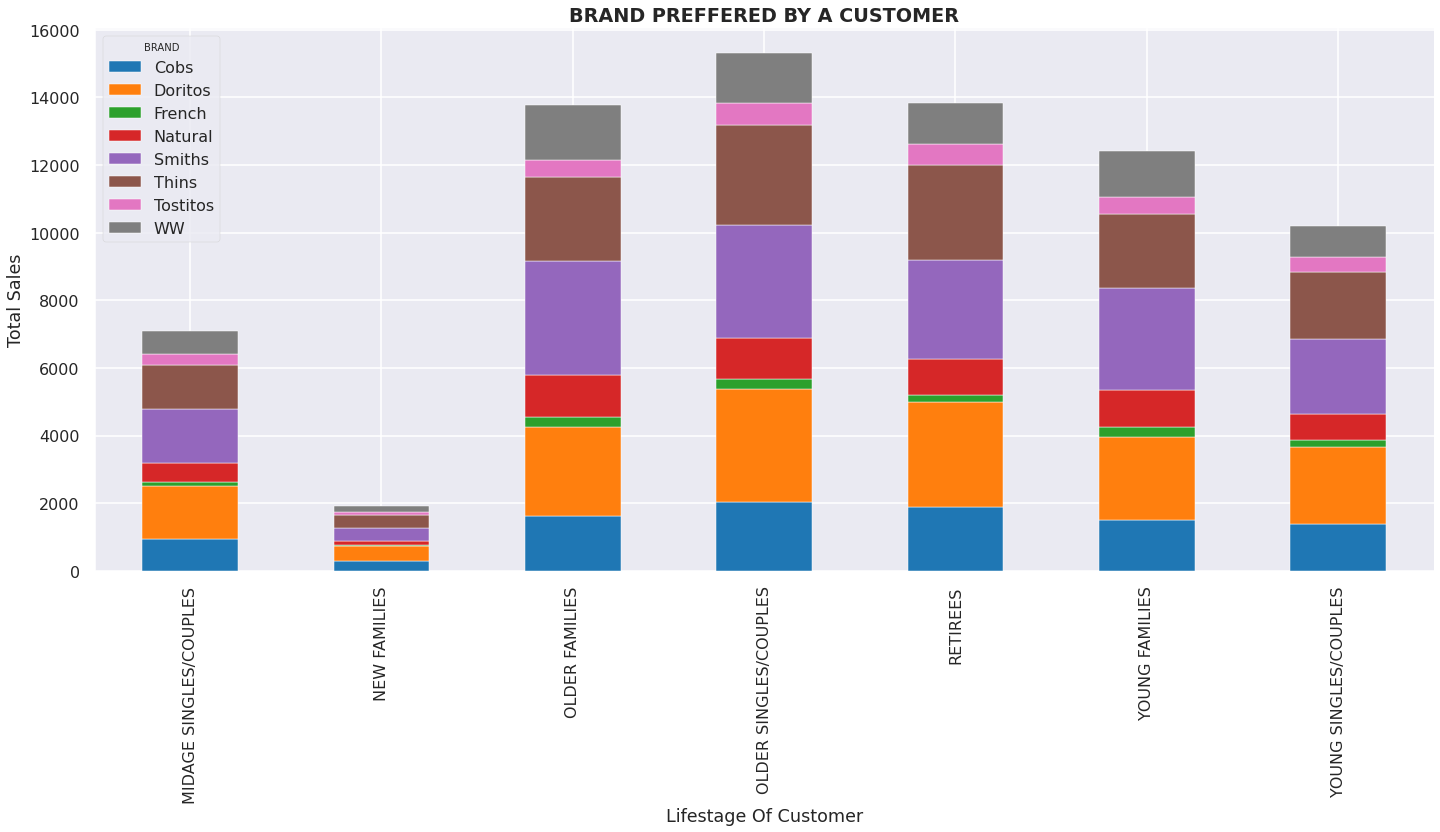

In [45]:
plt.rcParams['figure.figsize'] = (24, 10)
combined_data.groupby(['LIFESTAGE','BRAND']).size().unstack().plot(kind='bar',stacked=True)
plt.title('BRAND PREFFERED BY A CUSTOMER',fontweight='bold')
plt.ylabel('Total Sales')
plt.xlabel('Lifestage Of Customer')
plt.show()

**INSIGHTS:**
1. Smiths and Doritos are most preferred by customers of all life stages
2. French and Tositos is the least preferred by customers of all life stages